In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import DateType
from pyspark.sql.functions import to_date
import matplotlib.pyplot as plt
from pyspark.ml.feature import StringIndexerfrom pyspark.sql import SparkSession
import pandas as pd

spark = SparkSession.builder.appName("cabai").getOrCreate()

# Gantilah 'nama_file.csv' dengan nama file data Anda
data = pd.read_csv('fix.csv')

# Pastikan 'Tanggal' diubah menjadi tipe data datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'])


In [3]:
# Cek missing values di setiap kolom
print(data.isnull().sum())


Tanggal                  0
DKI Jakarta              0
pasar glodok             0
pasar senen              0
pasar Minggu             0
Pasar kramat jati        0
pasar Sunter Podomoro    0
dtype: int64


In [4]:
# Ubah tipe data kolom harga ke numerik
data['DKI Jakarta'] = pd.to_numeric(data['DKI Jakarta'].str.replace(',', ''))
data['pasar glodok'] = pd.to_numeric(data['pasar glodok'].str.replace(',', ''))
data['pasar senen'] = pd.to_numeric(data['pasar senen'].str.replace(',', ''))
data['pasar Minggu'] = pd.to_numeric(data['pasar Minggu'].str.replace(',', ''))
data['Pasar kramat jati'] = pd.to_numeric(data['Pasar kramat jati'].str.replace(',', ''))
data['pasar Sunter Podomoro'] = pd.to_numeric(data['pasar Sunter Podomoro'].str.replace(',', ''))

In [5]:
# Hapus baris yang duplikat
data = data.drop_duplicates()

In [6]:
# Urutkan data berdasarkan kolom 'Tanggal'
data = data.sort_values(by='Tanggal')

In [7]:
# Ambil skema DataFrame Pandas
data.dtypes


Tanggal                  datetime64[ns]
DKI Jakarta                     float64
pasar glodok                    float64
pasar senen                     float64
pasar Minggu                    float64
Pasar kramat jati               float64
pasar Sunter Podomoro           float64
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


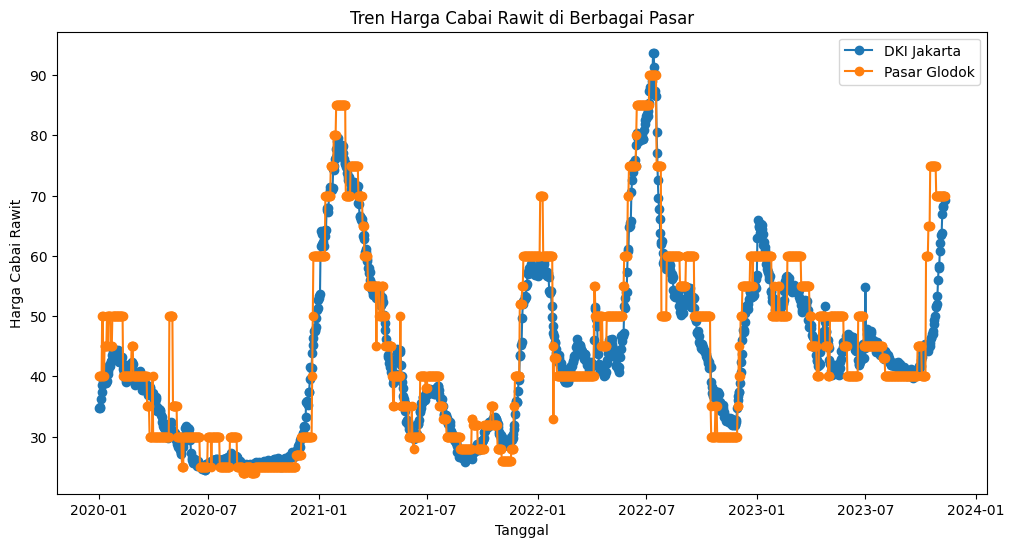

In [9]:

plt.figure(figsize=(12, 6))
plt.plot(data['Tanggal'], data['DKI Jakarta'], label='DKI Jakarta', marker='o')
plt.plot(data['Tanggal'], data['pasar glodok'], label='Pasar Glodok', marker='o')
# Tambahkan garis atau plot untuk pasar lainnya
plt.xlabel('Tanggal')
plt.ylabel('Harga Cabai Rawit')
plt.title('Tren Harga Cabai Rawit di Berbagai Pasar')
plt.legend()
plt.show()

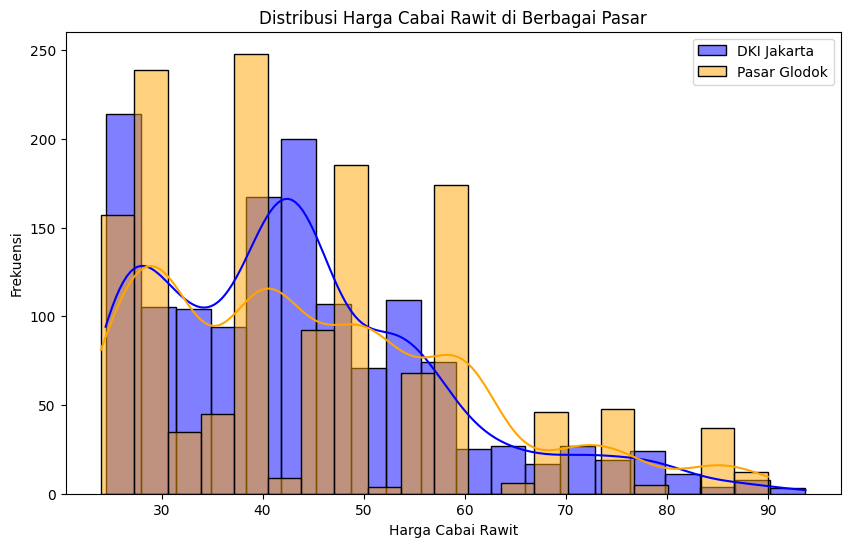

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['DKI Jakarta'], bins=20, kde=True, color='blue', label='DKI Jakarta')
sns.histplot(data['pasar glodok'], bins=20, kde=True, color='orange', label='Pasar Glodok')
# Tambahkan histogram atau KDE untuk pasar lainnya
plt.xlabel('Harga Cabai Rawit')
plt.ylabel('Frekuensi')
plt.title('Distribusi Harga Cabai Rawit di Berbagai Pasar')
plt.legend()
plt.show()

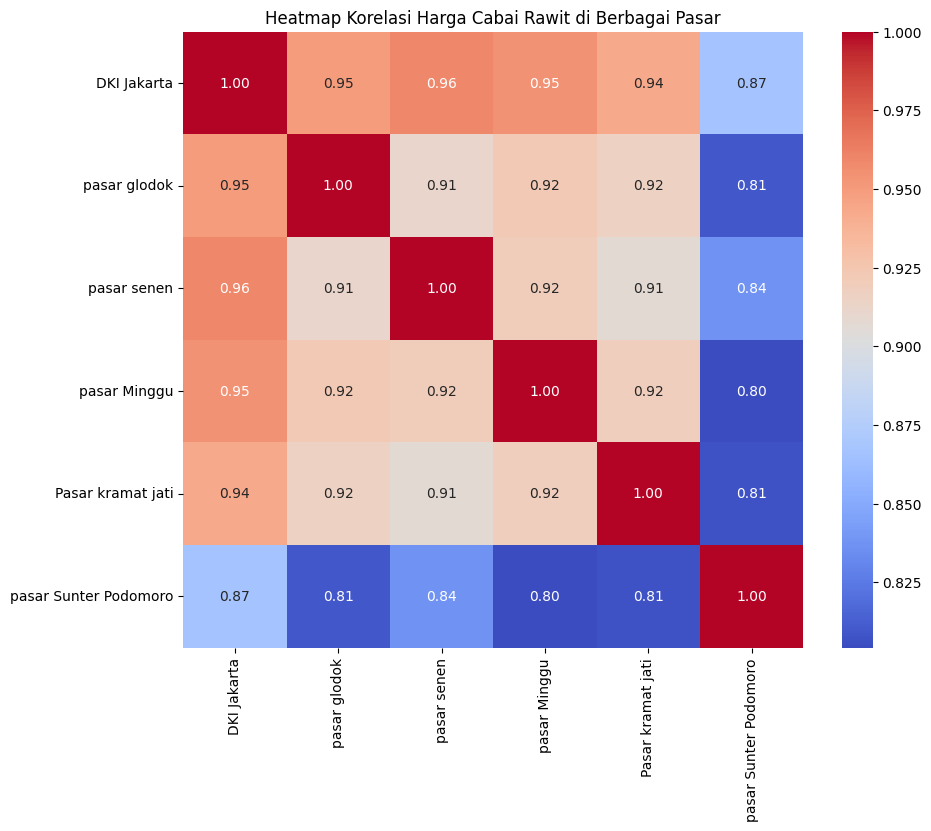

In [11]:
correlation_matrix = data[['DKI Jakarta', 'pasar glodok', 'pasar senen', 'pasar Minggu', 'Pasar kramat jati', 'pasar Sunter Podomoro']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Harga Cabai Rawit di Berbagai Pasar')
plt.show()

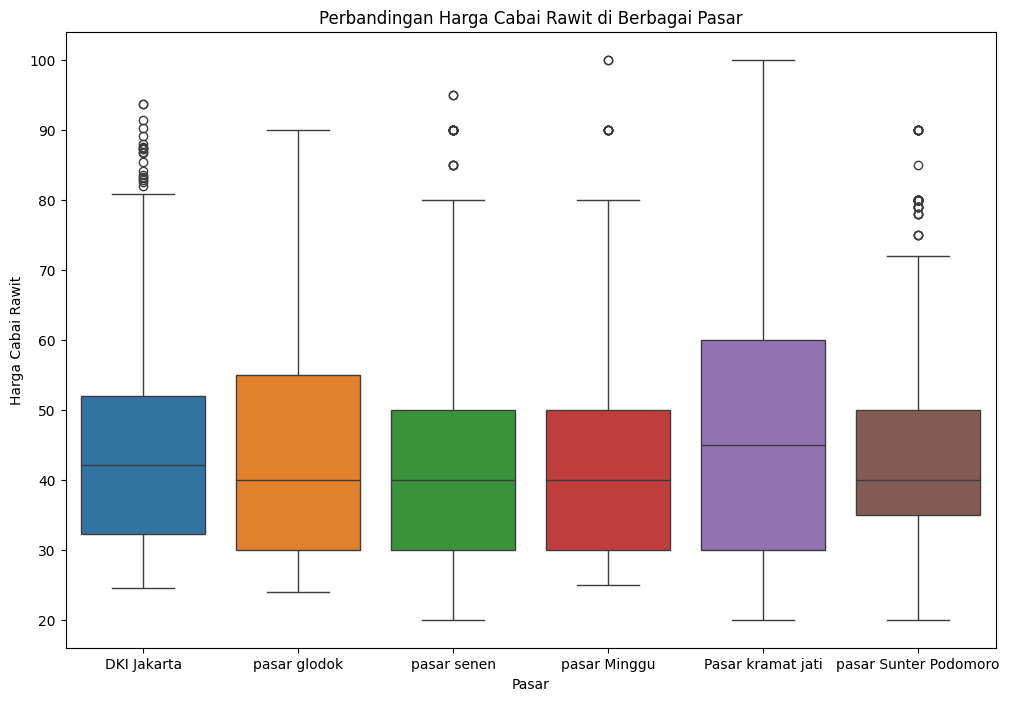

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['DKI Jakarta', 'pasar glodok', 'pasar senen', 'pasar Minggu', 'Pasar kramat jati', 'pasar Sunter Podomoro']])
plt.xlabel('Pasar')
plt.ylabel('Harga Cabai Rawit')
plt.title('Perbandingan Harga Cabai Rawit di Berbagai Pasar')
plt.show()

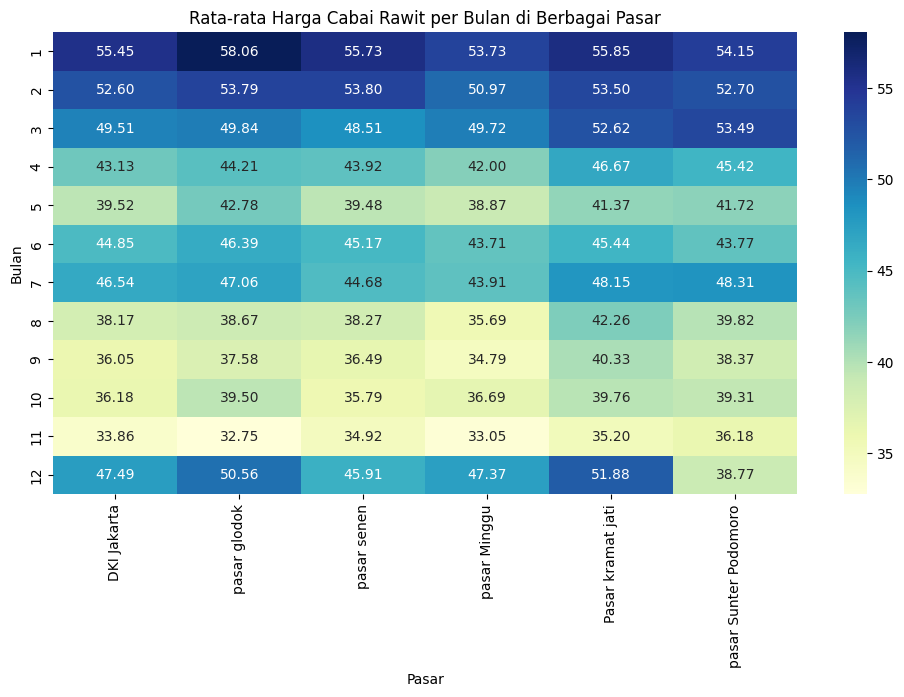

In [13]:
# Contoh visualisasi musiman menggunakan heatmap
monthly_data = data.groupby(data['Tanggal'].dt.month)[['DKI Jakarta', 'pasar glodok', 'pasar senen', 'pasar Minggu', 'Pasar kramat jati', 'pasar Sunter Podomoro']].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_data, cmap='YlGnBu', annot=True, fmt=".2f")
plt.xlabel('Pasar')
plt.ylabel('Bulan')
plt.title('Rata-rata Harga Cabai Rawit per Bulan di Berbagai Pasar')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime as dt

# Ensure 'Tanggal' is in datetime format
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

# Convert 'Tanggal' to ordinal
X = data['Tanggal'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)
y = data['DKI Jakarta'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices for the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 161.92743236987263


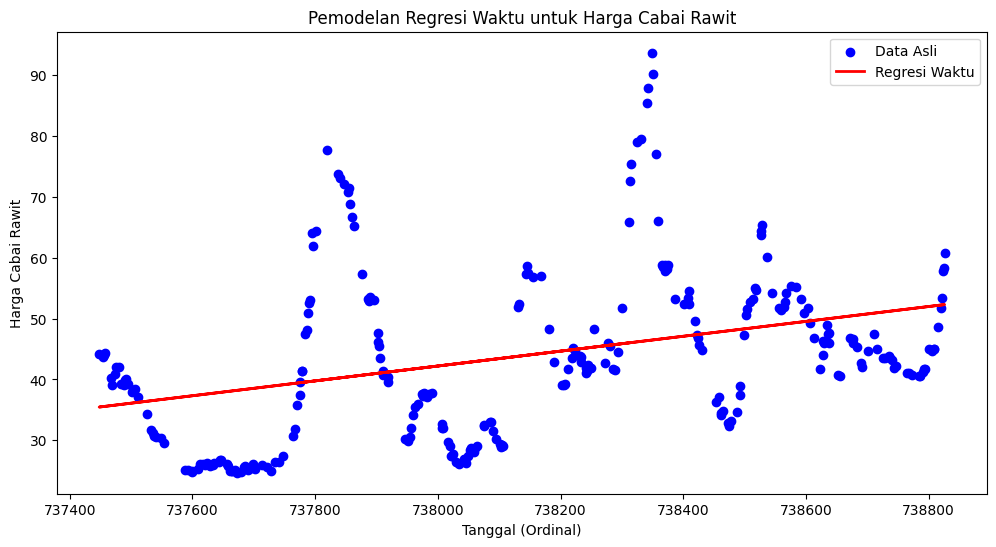

In [15]:
# Visualisasi hasil prediksi dan data asli
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Data Asli')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresi Waktu')
plt.xlabel('Tanggal (Ordinal)')
plt.ylabel('Harga Cabai Rawit')
plt.title('Pemodelan Regresi Waktu untuk Harga Cabai Rawit')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 161.92743236987263


In [17]:
# Import NumPy
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 12.725071016299777


In [18]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 9.936280432460201


In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.1420873752295686


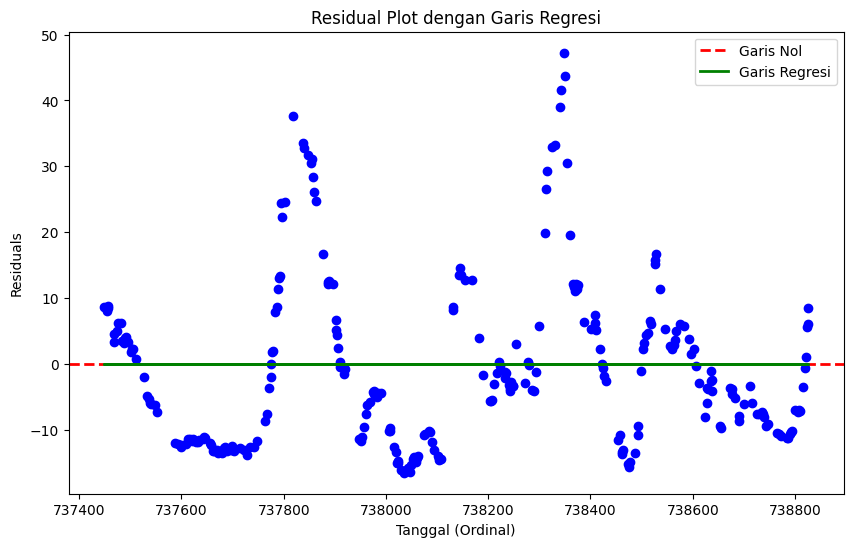

In [20]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Garis Nol')
plt.plot(X_test, np.zeros_like(residuals), color='green', linestyle='-', linewidth=2, label='Garis Regresi')
plt.xlabel('Tanggal (Ordinal)')
plt.ylabel('Residuals')
plt.title('Residual Plot dengan Garis Regresi')
plt.legend()
plt.show()


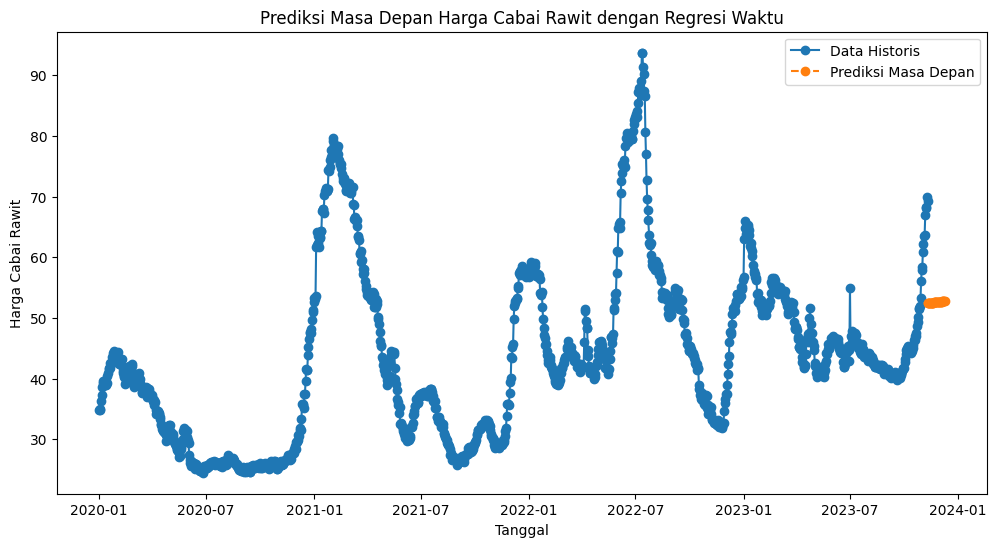

In [21]:
# Buat prediksi untuk masa depan
future_dates = pd.date_range(start=data['Tanggal'].max(), periods=30, freq='D')
future_ordinal = future_dates.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)
future_predictions = model.predict(future_ordinal)

# Visualisasi prediksi masa depan
plt.figure(figsize=(12, 6))
plt.plot(data['Tanggal'], data['DKI Jakarta'], label='Data Historis', marker='o')
plt.plot(future_dates, future_predictions, label='Prediksi Masa Depan', linestyle='--', marker='o')
plt.xlabel('Tanggal')
plt.ylabel('Harga Cabai Rawit')
plt.title('Prediksi Masa Depan Harga Cabai Rawit dengan Regresi Waktu')
plt.legend()
plt.show()

In [22]:
print(data.columns)

Index(['Tanggal', 'DKI Jakarta', 'pasar glodok', 'pasar senen', 'pasar Minggu',
       'Pasar kramat jati', 'pasar Sunter Podomoro'],
      dtype='object')


In [25]:
# Buat DataFrame untuk prediksi masa depan
future_predictions_df = pd.DataFrame({
    'Tanggal': future_dates,
    'Prediksi_Harga': future_predictions
})

# Gabungkan DataFrame prediksi masa depan dengan data historis
merged_data = pd.concat([data, future_predictions_df])

# Tampilkan tabel dalam bentuk plain text
table_str = merged_data.to_string(index=False)

# Tampilkan tabel
print(table_str)


   Tanggal  DKI Jakarta  pasar glodok  pasar senen  pasar Minggu  Pasar kramat jati  pasar Sunter Podomoro  Prediksi_Harga
2020-01-01       34.809        40.000         35.0          30.0               40.0                   40.0             NaN
2020-01-02       34.809        40.000         35.0          30.0               40.0                   40.0             NaN
2020-01-03       34.957        40.000         35.0          30.0               40.0                   40.0             NaN
2020-01-04       36.234        40.000         30.0          30.0               55.0                   40.0             NaN
2020-01-05       37.340        40.000         30.0          32.0               55.0                   40.0             NaN
2020-01-06       38.574        50.000         30.0          35.0               40.0                   50.0             NaN
2020-01-07       39.532        50.000         35.0          35.0               40.0                   49.0             NaN
2020-01-08      